Frame number : 0
Frame number : 1
Frame number : 2
Frame number : 3
Frame number : 4
Frame number : 5
Frame number : 6
Frame number : 7
Frame number : 8
Frame number : 9
Frame number : 10


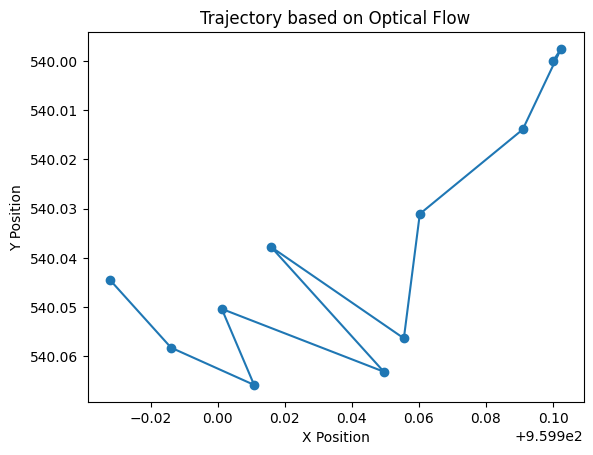

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Video laden
video_path = '/mnt/hdd02/cleaned_ba_copter_videos/Flight_01/01.MP4'
cap = cv2.VideoCapture(video_path)

# Erste Frame einlesen und in Graustufen konvertieren
ret, first_frame = cap.read()
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Initialisierung des Parameters für die Farneback-Methode
params = dict(pyr_scale=0.5, levels=3, winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)

# Punkte für die Trajektorie
trajectory = []

# Hauptschleife zum Berechnen des optischen Flusses und der Trajektorie
while cap.isOpened() and len(trajectory) <= 10:
    ret, frame = cap.read()
    if not ret:
        break

    print("Frame number :", len(trajectory))
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Berechne den optischen Fluss
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, **params)
    
    # Berechne die mittlere Bewegungsrichtung
    mean_flow = np.mean(flow, axis=(0, 1))
    
    # Update Trajektorie
    if trajectory:
        new_point = (trajectory[-1][0] + mean_flow[0], trajectory[-1][1] + mean_flow[1])
    else:
        new_point = (first_frame.shape[1] // 2, first_frame.shape[0] // 2)
    
    trajectory.append(new_point)
    
    # Setze das aktuelle Frame als vorheriges Frame für den nächsten Durchlauf
    prev_gray = gray

cap.release()

# Trajektorie visualisieren
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o')
plt.title('Trajectory based on Optical Flow')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().invert_yaxis()  # Bildachsen umdrehen, um die typische Bilddarstellung zu erhalten
plt.show()
